### Домашнее задание 1:
данные: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

import missingno as msno
import xgboost as xgb

%matplotlib inline

### Задание 1:
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [2]:
TRAIN = './train.csv'
TEST = './test.csv'

In [3]:
train = pd.read_csv(TRAIN, index_col='ID_code')
test = pd.read_csv(TEST, index_col='ID_code')
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
print(train.shape, test.shape)

(200000, 201) (200000, 200)


In [5]:
target = train['target']

In [6]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Сразу видим, что у признака var8 среднее сильно отличается от медианы, скорее всего есть выбросы.
Все признаки имеют непрерывные значения.
Пропусков не видно.

<AxesSubplot:>

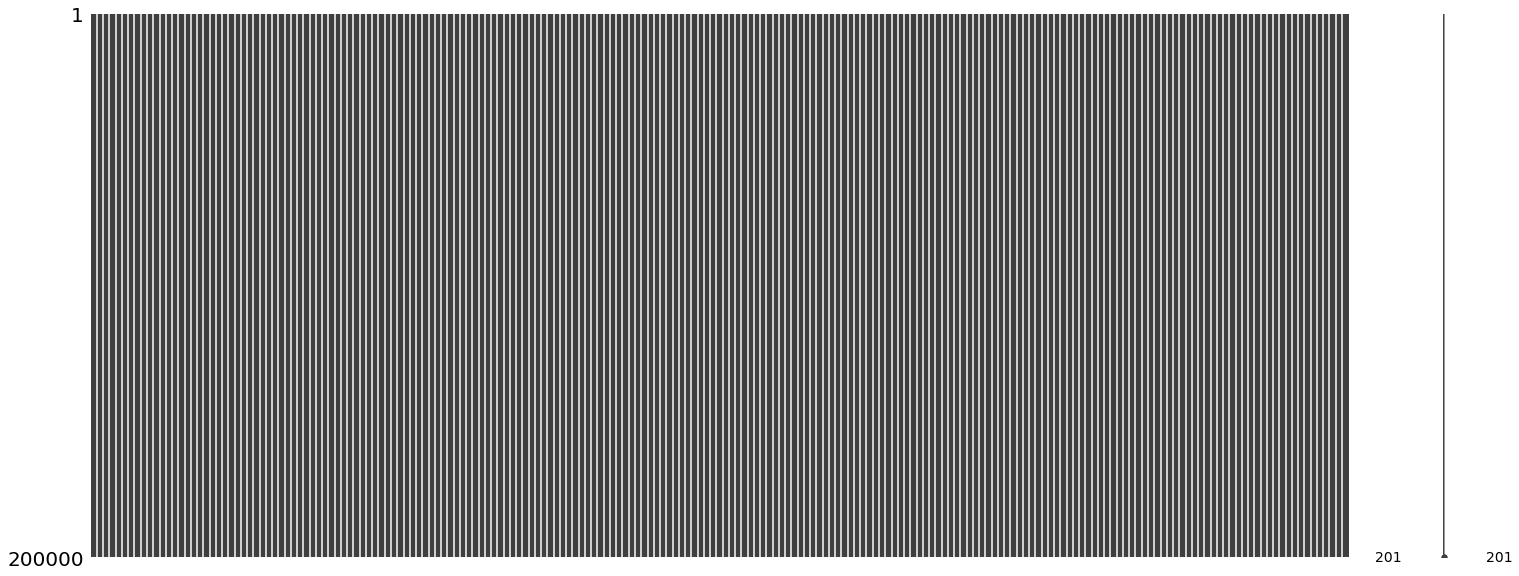

In [7]:
msno.matrix(train)

Да, пропусков нет

### Задание 2:
Сделать базовый анализ целевой переменной, сделать выводы;

In [8]:
target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

Есть перекос в распределении целевой переменной

Думаю, что сравнивать бинарный таргет с нормальным или другими распределениями не нужно

### Задание 3:
Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

<AxesSubplot:>

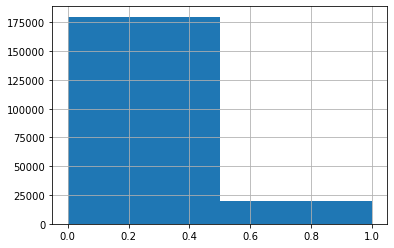

In [9]:
target.hist(bins=2)

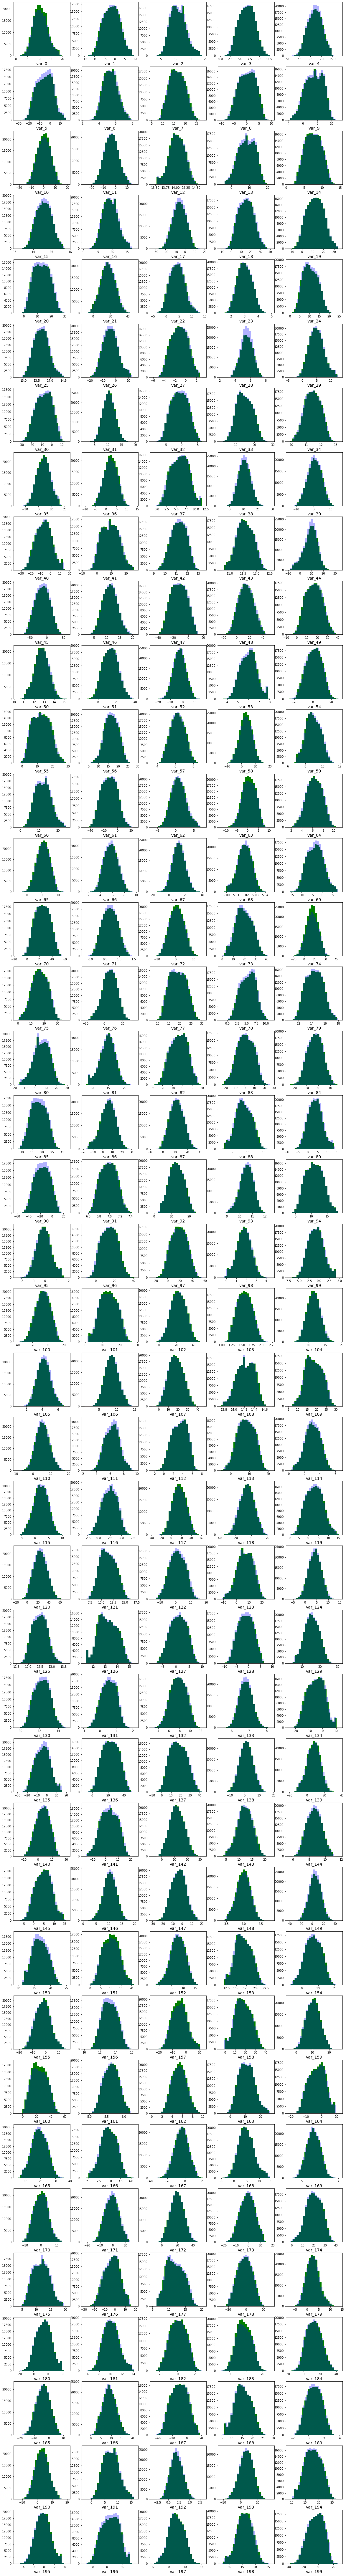

In [10]:
fig, axes = plt.subplots(40, 5, figsize=(20, 160))

for num, feature in enumerate(train.drop('target', axis=1).columns):
    data_test = test[feature].copy()
    data_train = train[feature].copy()
    axes[num//5, num%5].hist(data_test, bins=25, color="green")
    axes[num//5, num%5].hist(data_train, bins=25, color="blue", alpha = 0.3)
    axes[num//5, num%5].set_xlabel(feature, fontsize=14)

Признаки распределены в основном нормально. Есть небольшие отклонения как по skew, так и по kurtosis (по kurtosis как будто больше). Между тестовыми и тренировачными распределениями довольно на многих признаках есть небольшие различия.
Ожидания по поводу выбросов у признака var_8 не оправдались, различия между медианой и средним из-за отклонения распределения от нормального.
Выбросов вообще не видно.

Проверим избранные в задании признаки:

In [11]:
several_features = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10',
                    'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 'var_80',
                    'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']
len(several_features)

18

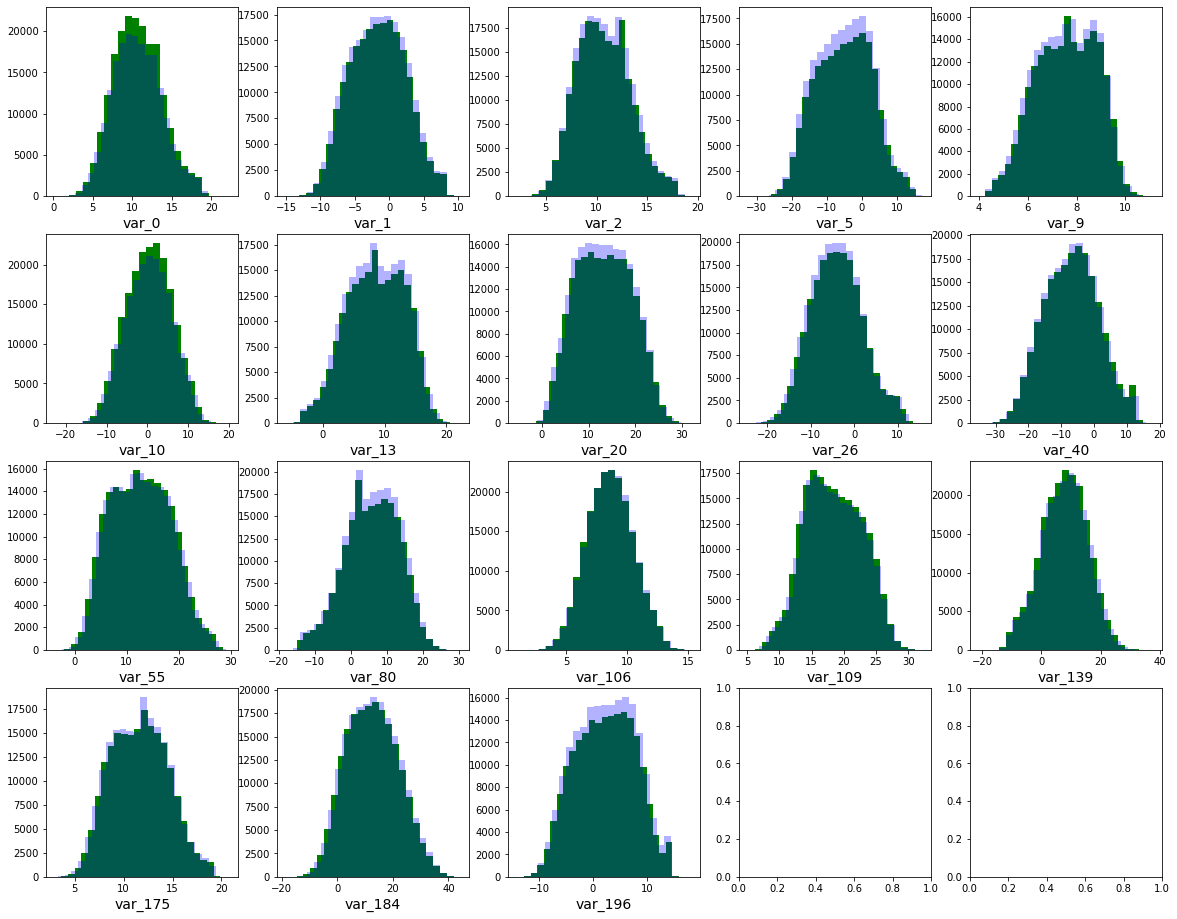

In [12]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for num, feature in enumerate(train[several_features]):
    data_test = test[feature].copy()
    data_train = train[feature].copy()
    axes[num//5, num%5].hist(data_test, bins=25, color="green")
    axes[num//5, num%5].hist(data_train, bins=25, color="blue", alpha=0.3)
    axes[num//5, num%5].set_xlabel(feature, fontsize=14)

Видимо, выбраны наиболее различные по форме распределения.

### Задание 4:
Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

In [13]:
correlation = train.corr()
corr_with_target = correlation['target'].sort_values(ascending=False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

Линейной зависимости между признаками и таргетом нет, даже график не нужен

### Задание 5:
Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

<AxesSubplot:>

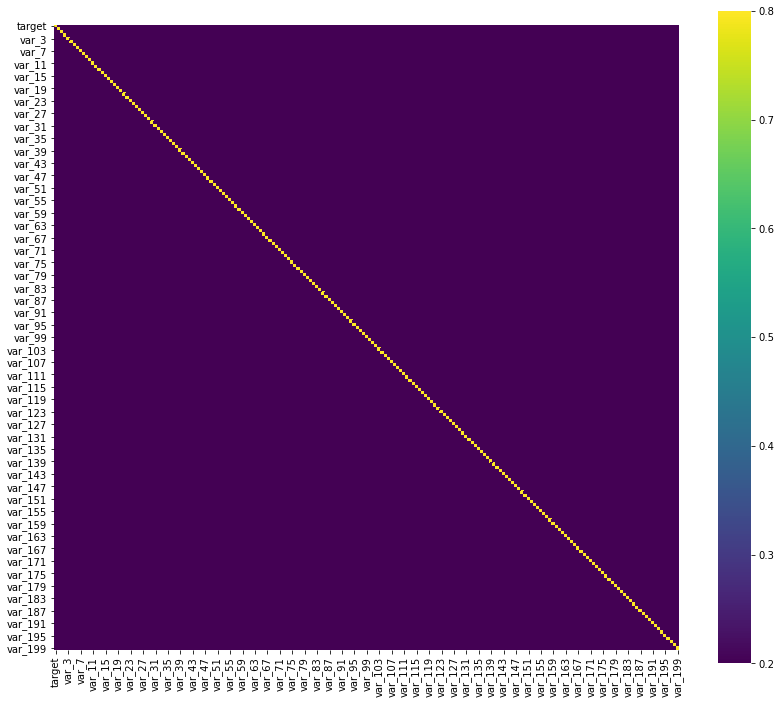

In [14]:
fig, axes = plt.subplots(figsize= (14,12))
sns.heatmap(correlation, square=True, vmin=0.2, vmax=0.8, cmap='viridis')

между признаками линейной зависимости тоже нет

### Задание 6:
Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [15]:
parameters = {'max_depth': 6, 'n_estimators': 25, 'random_state': 42, 'n_jobs': -1}

forest = RandomForestClassifier(**parameters)
forest.fit(train.drop('target', axis=1), target)

RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=-1, random_state=42)

<AxesSubplot:>

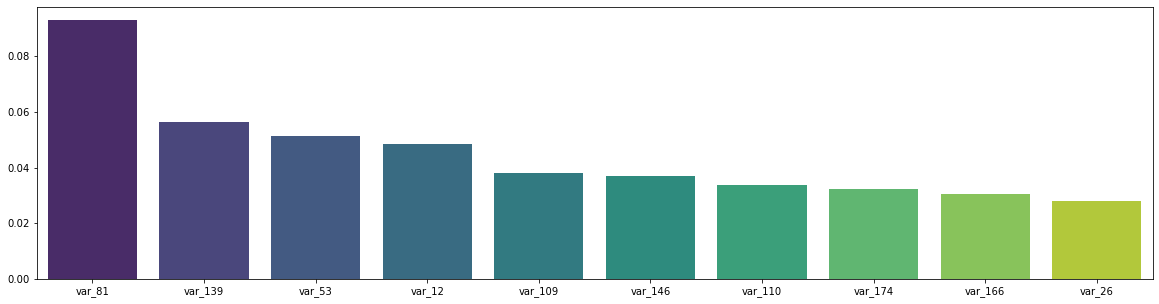

In [16]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0: n_top]
feature_names = train.drop('target', axis=1).columns

plt.figure(figsize=(20,5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette='viridis')

In [17]:
print(f'10 признаков с наибольшей нелинейной связью с целевой переменной:\n{list(feature_names[idx])}')

10 признаков с наибольшей нелинейной связью с целевой переменной:
['var_81', 'var_139', 'var_53', 'var_12', 'var_109', 'var_146', 'var_110', 'var_174', 'var_166', 'var_26']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


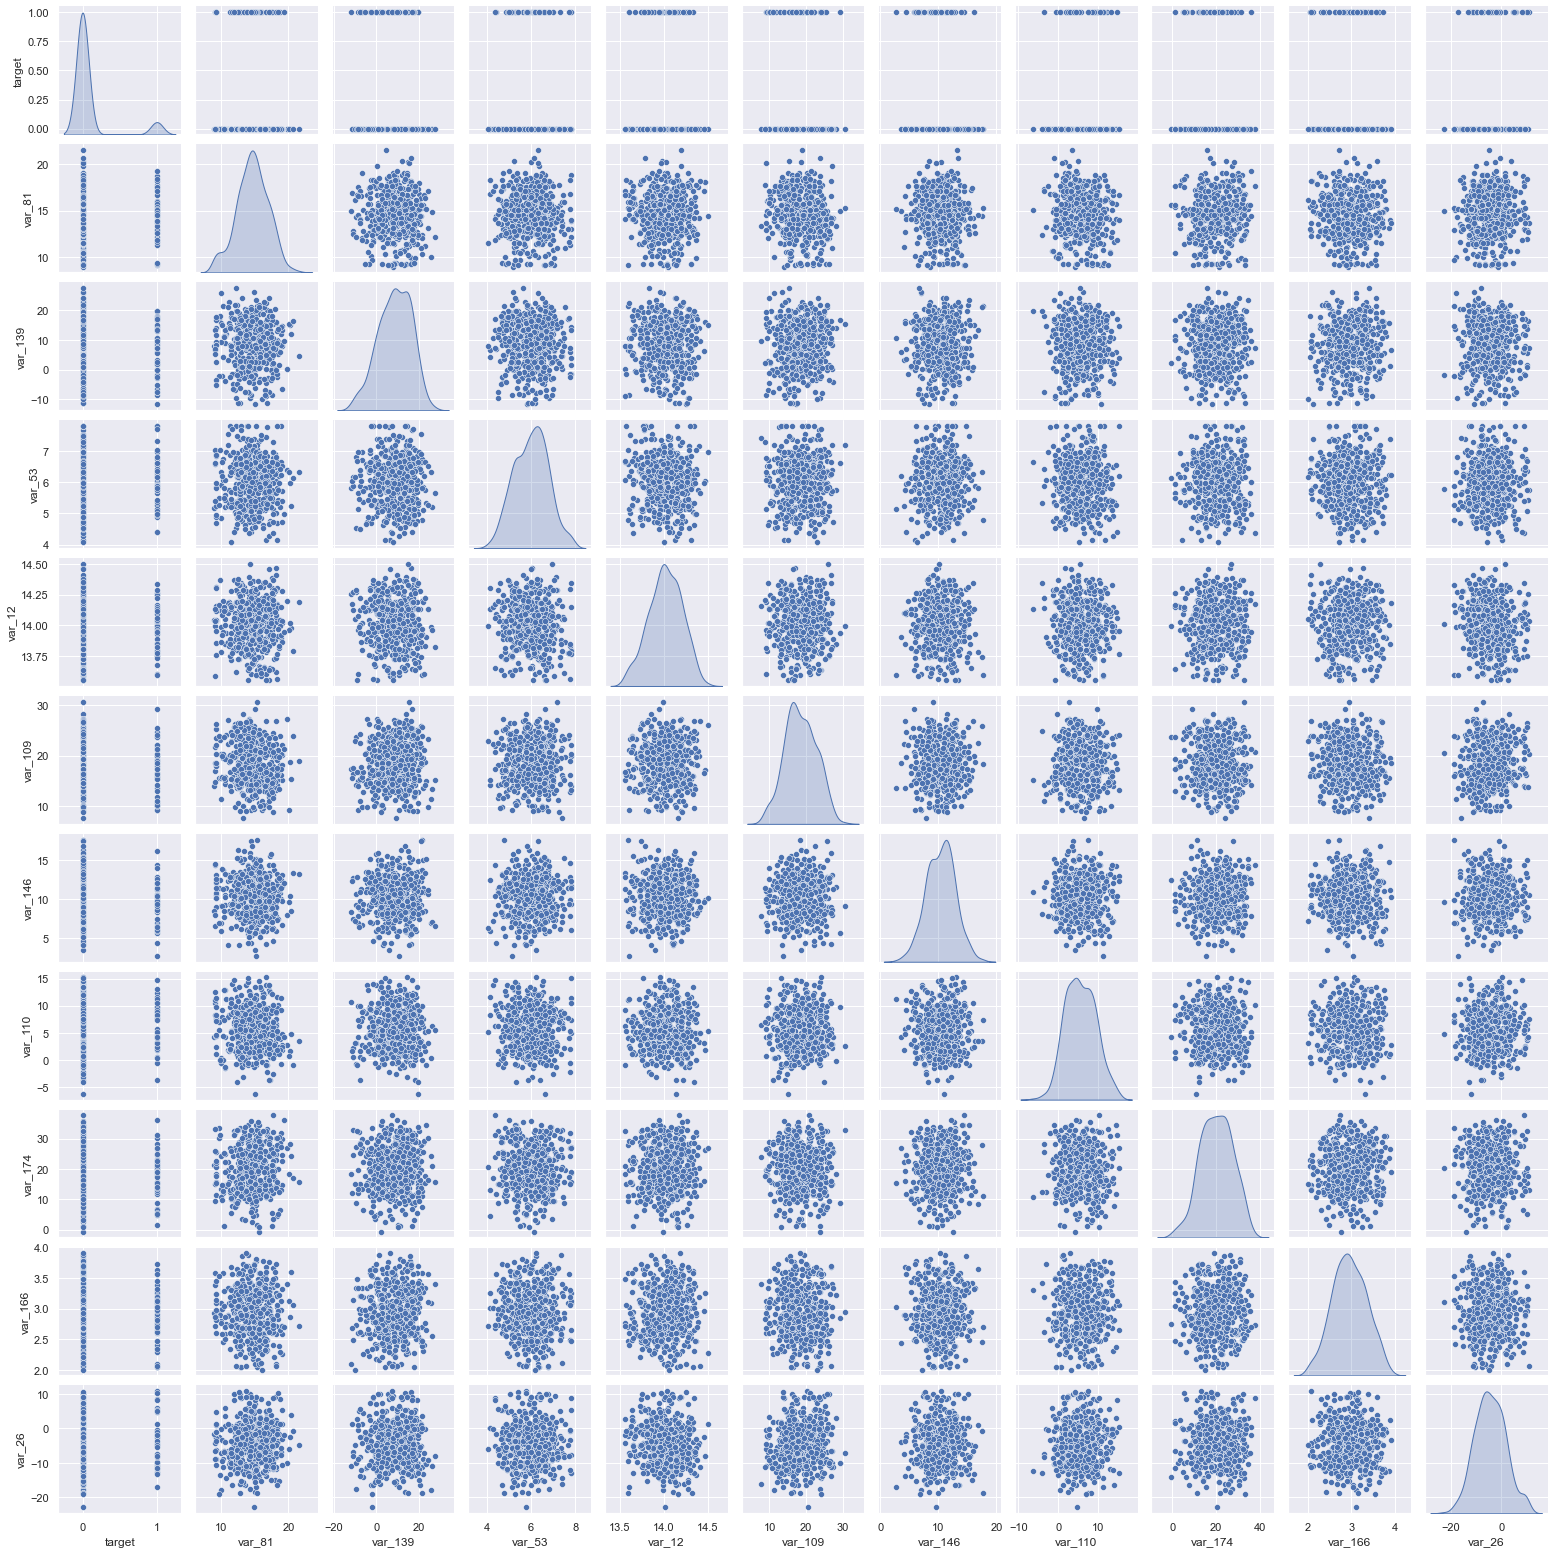

In [18]:
sns.set()
columns = ['target'] + list(feature_names[idx])
sns.pairplot(train[columns].head(500), size=2, kind='scatter', diag_kind='kde')
plt.show()

Мой неопытный взгляд ничего особенного не увидел..

### Задание 7 (опция):
Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

In [19]:
data_train = train.drop('target', axis=1)

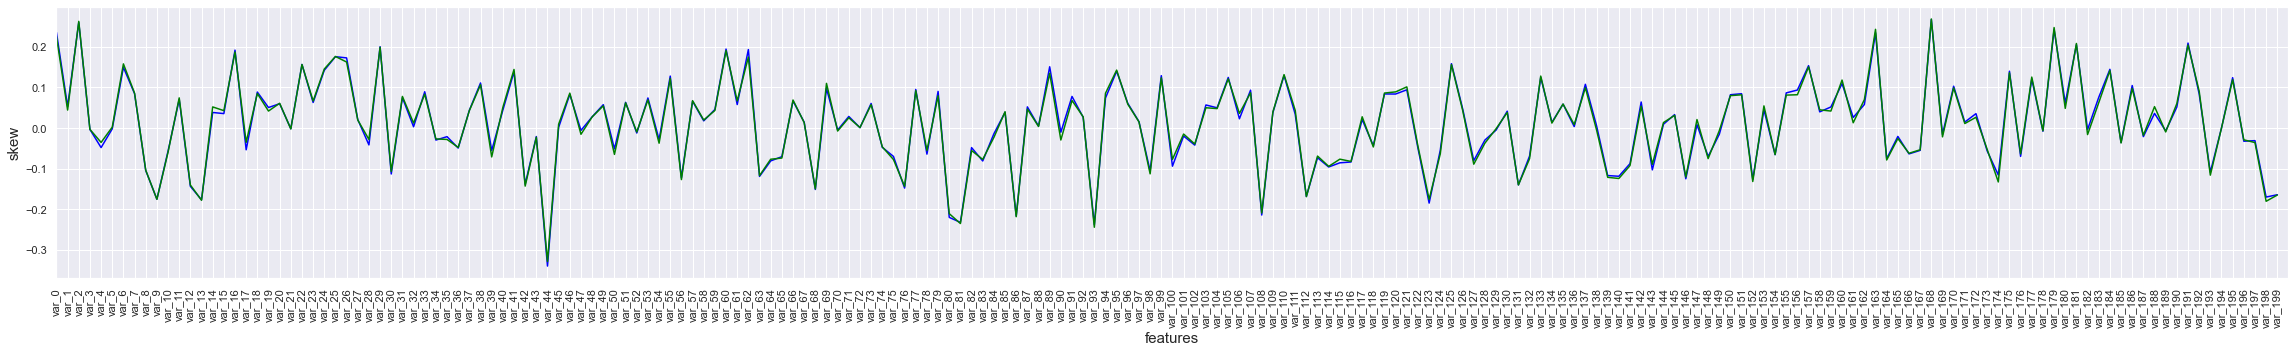

In [20]:
fig = plt.figure(figsize=(40,5))
train_stats, test_stats = data_train.skew(), test.skew()
plt.plot(train_stats, color='blue', label='train')
plt.plot(test_stats, color='green', label='test')
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel('features', size=15)
plt.xlim(0, len(train_stats))
plt.ylabel('skew', size=15)
plt.show()

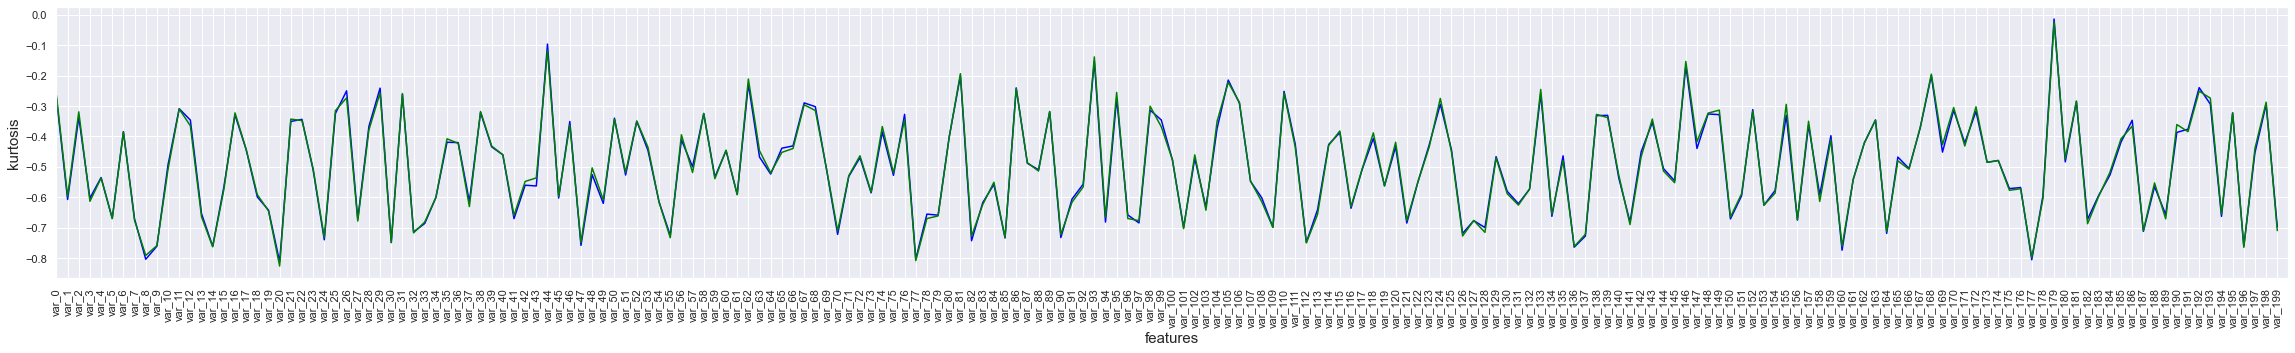

In [21]:
fig = plt.figure(figsize=(40,5))
train_stats, test_stats = data_train.kurtosis(), test.kurtosis()
plt.plot(train_stats, color='blue', label='train')
plt.plot(test_stats, color='green', label='test')
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel('features', size=15)
plt.xlim(0, len(train_stats))
plt.ylabel('kurtosis', size=15)
plt.show()

Значимых различий не видно, как и было видно в пункте 3. Как и ожидалось смещений по kurtosis больше (болье было различий по амплитуде, а не по форме)